In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Q4和Q5的程序

Original VC bound (10000) and (5):  0.632203362312 	 13.828161485
Rademacher Penalty Bound (10000) and (5):  0.33132369478 	 7.04877656418
Parrondo and Van den Broek (10000) and (5):  0.223708366246 	 5.10136198199
Devroye (10000) and (5):  0.215237656725 	 5.59312554318
Variant VC bound (10000) and (5):  0.860464345894 	 16.264111061


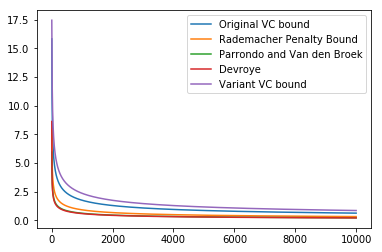

In [3]:
n = np.arange(3, 10000)
f1 = np.sqrt(8/n*(np.log(80)+50*np.log(2*n)))
print('Original VC bound (10000) and (5): ', f1[-1], '\t', f1[2])
f2 = np.sqrt(2/n*(np.log(2*n)+50*np.log(n)))+np.sqrt(2/n*math.log(20))+1/n
print('Rademacher Penalty Bound (10000) and (5): ', f2[-1], '\t', f2[2])
f3 = 1/n+np.sqrt(1/np.power(n, 2)+1/n*(np.log(120)+50*np.log(2*n)))
print('Parrondo and Van den Broek (10000) and (5): ', f3[-1], '\t', f3[2])
f4 = 1/(n-2)+np.sqrt(1/np.power(n-2, 2)+1/(2*n-4)*(np.log(80)+100*np.log(n)))
print('Devroye (10000) and (5): ', f4[-1], '\t', f4[2])
f5 = np.sqrt(16/n*(np.log(2/math.sqrt(0.05))+50*np.log(n)))
print('Variant VC bound (10000) and (5): ', f5[-1], '\t', f5[2])
plt.plot(n, f1, label='Original VC bound')
plt.plot(n, f2, label='Rademacher Penalty Bound')
plt.plot(n, f3, label='Parrondo and Van den Broek')
plt.plot(n, f4, label='Devroye')
plt.plot(n, f5, label='Variant VC bound')
plt.legend()
plt.show()

Q16-Q20的程序

In [4]:
# 导入数据函数
def loadData(filename):
    data = pd.read_csv(filename, sep='\s+', header=None)
    data = data.as_matrix()
    col, row = data.shape
    X = np.c_[np.ones((col, 1)), data[:, 0: row-1]]
    Y = data[:, row-1:row]
    return X, Y

In [6]:
# 生成数据函数
def generateData():
    x = np.random.uniform(-1, 1, 20)
    y = np.sign(x)
    y[y == 0] = -1
    prop = np.random.uniform(0, 1, 20)
    y[prop >= 0.8] *= -1
    return x, y

In [7]:
# 单维度决策树桩算法
def decision_stump(X, Y):
    theta = np.sort(X)
    num = len(theta)
    Xtemp = np.tile(X, (num, 1))
    ttemp = np.tile(np.reshape(theta, (num, 1)), (1, num))
    ypred = np.sign(Xtemp - ttemp)
    ypred[ypred == 0] = -1
    err = np.sum(ypred != Y, axis=1)
    if np.min(err) <= num-np.max(err):
        return 1, theta[np.argmin(err)], np.min(err)/num
    else:
        return -1, theta[np.argmax(err)], (num-np.max(err))/num

In [12]:
# 多维度决策树桩算法
def decision_stump_multi(X, Y):
    row, col = X.shape
    err = np.zeros((col,)); s = np.zeros((col,)); theta = np.zeros((col,))
    for i in range(col):
        s[i], theta[i], err[i] = decision_stump(X[:, i], Y[:, 0])
    pos = np.argmin(err)
    return pos, s[pos], theta[pos], err[pos]

Q17

In [10]:
# Q17和Q18
totalin = 0; totalout = 0
for i in range(5000):
    X, Y = generateData()
    theta = np.sort(X)
    s, theta, errin = decision_stump(X, Y)
    errout = 0.5+0.3*s*(math.fabs(theta)-1)
    totalin += errin
    totalout += errout
print('训练集平均误差: ', totalin/5000)
print('测试集平均误差: ', totalout/5000)

训练集平均误差:  0.17111
测试集平均误差:  0.2613195070168455


In [13]:
# Q19和Q20
X, Y = loadData('hw2_train.dat')
Xtest, Ytest = loadData('hw2_test.dat')
pos, s, theta, err = decision_stump_multi(X, Y)
print('训练集误差: ', err)
ypred = s*np.sign(Xtest[:, pos]-theta)
ypred[ypred == 0] = -1
row, col = Ytest.shape
errout = np.sum(ypred != Ytest.reshape(row,))/len(ypred)
print('测试集误差: ', errout)

训练集误差:  0.25
测试集误差:  0.355
